In [ ]:
import os
import shutil
import alpacapella

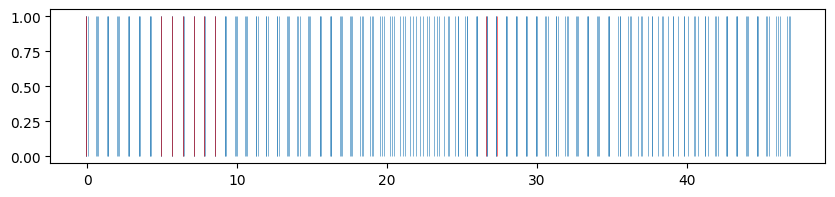

interpolated: 86.36%
bpm: 83.37
[-0.08515193  0.6323708   1.34989353  2.06741626  2.78493899  3.50246172
  4.21998445  4.93750718  5.65984127  6.37745397  7.09634376  7.81523356
  8.52963417  9.25199147  9.97434878 10.69670609 11.4190634  12.14142071
 12.86377802 13.58613533 14.30849264 15.03084995 15.75320726 16.47556457
 17.19792187 17.92027918 18.64263649 19.3649938  20.08735111 20.80970842
 21.53206573 22.25442304 22.97678035 23.69913766 24.42149497 25.14385228
 25.86620958 26.58856689 27.3037415  28.02199274 28.74024399 29.45849524
 30.17674649 30.89499773 31.61324898 32.33150023 33.04975147 33.76800272
 34.48625397 35.20450522 35.92275646 36.64100771 37.35925896 38.07751021
 38.79576145 39.5140127  40.23226395 40.95051519 41.66876644 42.38701769
 43.10526894 43.82352018 44.54177143 45.26002268 45.97827393 46.69652517]


ValueError: operands could not be broadcast together with shapes (0,) (4410,) (0,) 

In [ ]:
ANNOTATION_PATH = "../dataset"
name = """\
looperman-a-4761476-0022536-basic-instructionz
"""[:-1]
ACAPELLA_PATH = f"../dataset/looperman_sub/{name}.mp3"

annotation = alpacapella.pipeline(ANNOTATION_PATH, smoothing_size=2.2, voting_window=0.05)
alpacapella.play(ACAPELLA_PATH, annotation)


In [13]:
DATASET_PATH = "../dataset/dataset"
b = input("beat in bar: ")
alpacapella.write_dataset(ACAPELLA_PATH, DATASET_PATH, annotation, beats_in_bar=int(b), cutoff=2)

# remove the rest
DESTINATION = "../dataset/used"
l = len([x for x in os.listdir(DESTINATION) if not x.startswith('.')]) + 1
os.makedirs(os.path.join(DESTINATION, str(l)))
for i, file in enumerate(os.listdir(ANNOTATION_PATH)):
    if not file.endswith('.txt'):
        continue
    source = os.path.join(ANNOTATION_PATH, file)
    sink = os.path.join(DESTINATION, f"{l}", file)
    shutil.move(source, sink)
    os.rename(sink, os.path.join(DESTINATION, f"{l}", f"{name}{i}.txt"))
os.remove(ACAPELLA_PATH)